In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.svm import SVR
from sklearn import svm

In [2]:
data = pd.read_csv('bitcoin_dataset.csv')

In [3]:
data.fillna(method = 'pad',  inplace=True)

In [4]:
data.btc_n_orphaned_blocks =data.btc_n_orphaned_blocks.astype('category')

In [5]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.393579,0.999783,0.868841,0.674818,0.544033,0.544125,0.281177,0.920876,0.915678,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.393579,1.000000,0.385584,0.286219,0.779819,0.852794,0.832776,0.675648,0.489650,0.500957,...,-0.078993,0.373885,0.821856,0.834239,0.783986,0.815956,0.801724,0.293595,0.215718,0.388928
btc_market_cap,0.999783,0.385584,1.000000,0.869353,0.673091,0.541310,0.541702,0.277871,0.922073,0.916805,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868841,0.286219,0.869353,1.000000,0.521387,0.416131,0.430445,0.218843,0.758364,0.753544,...,-0.009400,0.689996,0.539453,0.453805,0.525605,0.442148,0.449879,0.097334,0.056055,0.896043
btc_blocks_size,0.674818,0.779819,0.673091,0.521387,1.000000,0.956191,0.946993,0.513376,0.826141,0.841039,...,-0.029983,0.446105,0.966840,0.950442,0.999785,0.952262,0.961439,0.252480,0.154697,0.672629
btc_avg_block_size,0.544033,0.852794,0.541310,0.416131,0.956191,1.000000,0.977887,0.558875,0.687581,0.705380,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_transactions_per_block,0.544125,0.832776,0.541702,0.430445,0.946993,0.977887,1.000000,0.563395,0.670598,0.692977,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.281177,0.675648,0.277871,0.218843,0.513376,0.558875,0.563395,1.000000,0.354346,0.378267,...,-0.055215,0.183495,0.518345,0.549277,0.518870,0.514467,0.539214,0.307848,0.215433,0.284652
btc_hash_rate,0.920876,0.489650,0.922073,0.758364,0.826141,0.687581,0.670598,0.354346,1.000000,0.990243,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864
btc_difficulty,0.915678,0.500957,0.916805,0.753544,0.841039,0.705380,0.692977,0.378267,0.990243,1.000000,...,-0.016267,0.684310,0.774924,0.704784,0.844351,0.698373,0.721406,0.164141,0.082845,0.879466


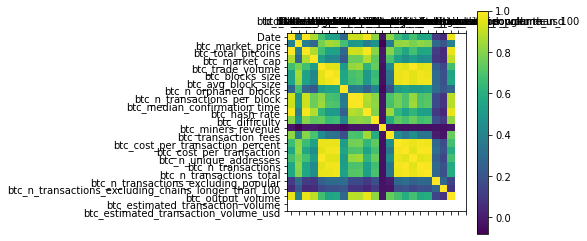

In [6]:

plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

In [7]:
data_new = data.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)


scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(data_new)
train_d2 = pd.DataFrame(train_d1,columns=data_new.columns)

In [8]:
X = train_d2.iloc[:, 1:21]
y = train_d2.iloc[:, 0]

X = pd.DataFrame(X)
y = pd.DataFrame(y)

random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)



In [9]:
# # Create linear regression object
Model_Name=[]
Model_accu=[]

clf = linear_model.LinearRegression() 
reg = clf.fit(X_train, y_train)
accu=clf.score(X_test,y_test)
Model_Name.append("LinearRegression")
Model_accu.append(accu)
#print('linear model intercept: {}'.format(reg.intercept_))

#print('linear model coeff:\n {}'.format(reg.coef_))

# #train score
scores =  cross_val_score(clf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score

pred_reg = reg.predict(X_test)
scores = cross_val_score(reg, y_test,pred_reg,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, reg.predict(X_test)))

R-squared score for training 0.9741250731925151
R-squared score for testing 0.9798862359188346
Mean Square error 0.00033019572775583127


In [10]:
random.seed(1234)

# Grid Search for Parameter Tuning 


# prepare a range of alpha values to test
k_range = np.array([1,2,3,4,5,6,7,8,9,10])

knn = KNeighborsRegressor(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid=dict(n_neighbors=k_range), cv= 5)
grid.fit(X, y)
#print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_:",grid.best_estimator_.n_neighbors)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
#print("R-squared score for training",scores.mean())
accu=model.score(X_test,y_test)
Model_Name.append("KNeighborsRegressor")
Model_accu.append(accu)
#test score
scores = cross_val_score(knn,y_test,knn_pred,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, knn.predict(X_test)))

grid.best_score_: -1.669586010622839
grid.best_estimator_: 10
R-squared score for testing 0.9881051216237322
Mean Square error 0.0002138744400346706


In [11]:
random.seed(1234)

# Grid Search for Algorithm Tuning

# prepare a range of alpha values to test
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
ridge_model = Ridge()
grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alphas), cv=5)

grid.fit(X, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

print('**********************------------------------------****************************')

#  Model for best alpha

model = Ridge(alpha=100)
ridge = model.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
accu=model.score(X_test,y_test)
Model_Name.append("Ridge")
Model_accu.append(accu)

print('ridge regression linear model intercept: {}'
     .format(ridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(ridge.coef_))

# #train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(ridge,y_test,ridge_pred,cv=5)
print("R-squared score for testing", scores.mean())

print('Number of non-zero features: {}'
     .format(np.sum(ridge.coef_ != 0)))
#MSE
print ("Mean Square error", mean_squared_error(y_test, ridge.predict(X_test)))

grid: GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
grid.best_score_: -185.68888592413396
grid.best_estimator_.alpha: 100.0
**********************------------------------------****************************
ridge regression linear model intercept: [-0.00434404]
ridge regression linear model coeff:
[[-1.80206982e-02  4.96594498e-02  4.62626645e-02  2.53445432e-03
  -1.39012184e-02  2.71422764e-03  4.36732879e-04  9.40280756e-02
   9.75805240e-02  4.38299480e-02  8.88816601e-05  1.09269885e-01
   3.25900826e-02  7.66192005e-03  4.79287147e-02  2.96206293e-03
   5.25186296e-03 -2.23324660e-03 -2.47027205e-03  9.15576348e-02]]
R-squared score for training 0.7463482234236938
R-squared score for testing 0.1146954955191312
Number of non-zero features: 20
Mean Square error 0.003779448912968662


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

df_X = X
df_y = y

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, df_y, random_state=0)

linreg = LinearRegression().fit(X_train_p, y_train_p)
accu=linreg.score(X_test_p,y_test_p)
Model_Name.append("LinearRegression with polynomial features")
Model_accu.append(accu)
#print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2) R-squared score (training): 1.000
(poly deg 2) R-squared score (test): 1.000



In [13]:
linreg = Ridge().fit(X_train_p, y_train_p)

#print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2 + ridge) R-squared score (training): 0.997
(poly deg 2 + ridge) R-squared score (test): 0.996


In [14]:

#svr
import warnings
warnings.filterwarnings("ignore")

Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilons = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilons}
grid_search = GridSearchCV(svm.SVR(kernel='linear'), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.001}


In [15]:
#kernelized SVM model
clf_rbf = SVR(kernel='rbf',C = 1, epsilon = 0.01, gamma = 0.01 )

svm_rbf = clf_rbf.fit(X_train, y_train)
svm_pred = svm_rbf.predict(X_test)
accu=clf_rbf.score(X_test,y_test)
Model_Name.append("SVM model")
Model_accu.append(accu)
# train score
scores =  cross_val_score(clf_rbf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())
#test score
scores = cross_val_score(svm_rbf,y_test,svm_pred,cv=5)
print("R-squared score for testing", scores.mean())
#MSE
print ("Mean Square error", mean_squared_error(y_test, svm_rbf.predict(X_test)))

R-squared score for training 0.9529178624803206
R-squared score for testing 0.6190977777751799
Mean Square error 0.0007247106494039087


In [16]:
bitcoin = pd.read_csv('bitcoin_dataset.csv')

#imputing missing values with the previous value
bitcoin = bitcoin.fillna(method = 'pad')

#dropping the target variable
bitcoin = bitcoin.drop(['Date', 'btc_market_cap','btc_miners_revenue'], axis = 1,errors = 'ignore')

feature_names_bitcoin = [ 'btc_total_bitcoins','btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks', 'btc_n_transactions_per_block', 'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_cost_per_transaction', 'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd']
X_bitcoin = bitcoin[feature_names_bitcoin]
y_bitcoin = bitcoin['btc_market_price']

test = pd.read_csv('test_set.csv')
test_new = test.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

In [17]:
random.seed(1234)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_bitcoin, y_bitcoin)
knn_pred = knn.predict(test_new)

print('Predicted market prices of bitcoin: \n', pd.DataFrame((knn_pred)*4.5, columns = ['Predicted_btc_market_price']))

Predicted market prices of bitcoin: 
     Predicted_btc_market_price
0                 50721.807748
1                 49787.928000
2                 49953.159900
3                 49520.874298
4                 49520.874298
5                 49787.928000
6                 49520.874298
7                 49520.874298
8                 49520.874298
9                 49953.159900
10                49953.159900
11                49953.159900
12                49647.848099
13                49953.159900


In [18]:
'''ENSAMBLED MODELS'''
x_en_name=[]
y_en_accu=[]

In [19]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
print(model.score(X_test,y_test)*100)
accu=model.score(X_test,y_test)
x_en_name.append('BaggingRegressor')
y_en_accu.append(accu)

99.1399637400938


In [20]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
x_en_name.append("AdaBoostRegressor")
accu=model.score(X_test,y_test)
y_en_accu.append(accu)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
accu=model.score(X_test,y_test)
x_en_name.append('GradientBoostingRegressor')
y_en_accu.append(accu)

In [22]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
accu=model.score(X_test,y_test)
x_en_name.append('xgb')
y_en_accu.append(accu)

[10:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


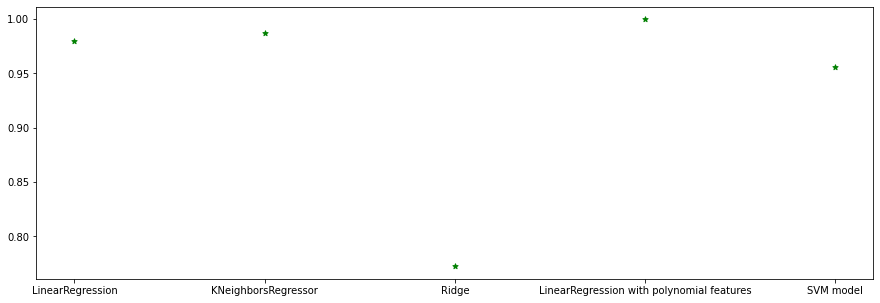

In [23]:
x=Model_Name
y=Model_accu
plt.figure(figsize=(15, 5))
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=30)

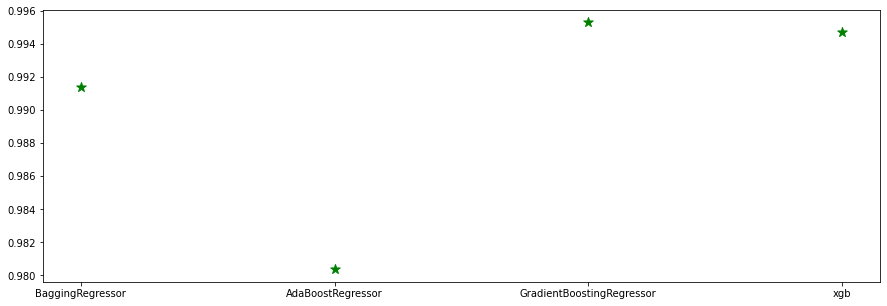

In [25]:
x=x_en_name
y=y_en_accu
plt.figure(figsize=(15, 5))
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=100)